<>:9: SyntaxWarning: invalid escape sequence '\i'
<>:9: SyntaxWarning: invalid escape sequence '\i'
C:\Users\HP\AppData\Local\Temp\ipykernel_11000\195201085.py:9: SyntaxWarning: invalid escape sequence '\i'
  df = pd.read_excel("..\input\BSNL_MPPLAB_Traffic_March_2025.xlsx")


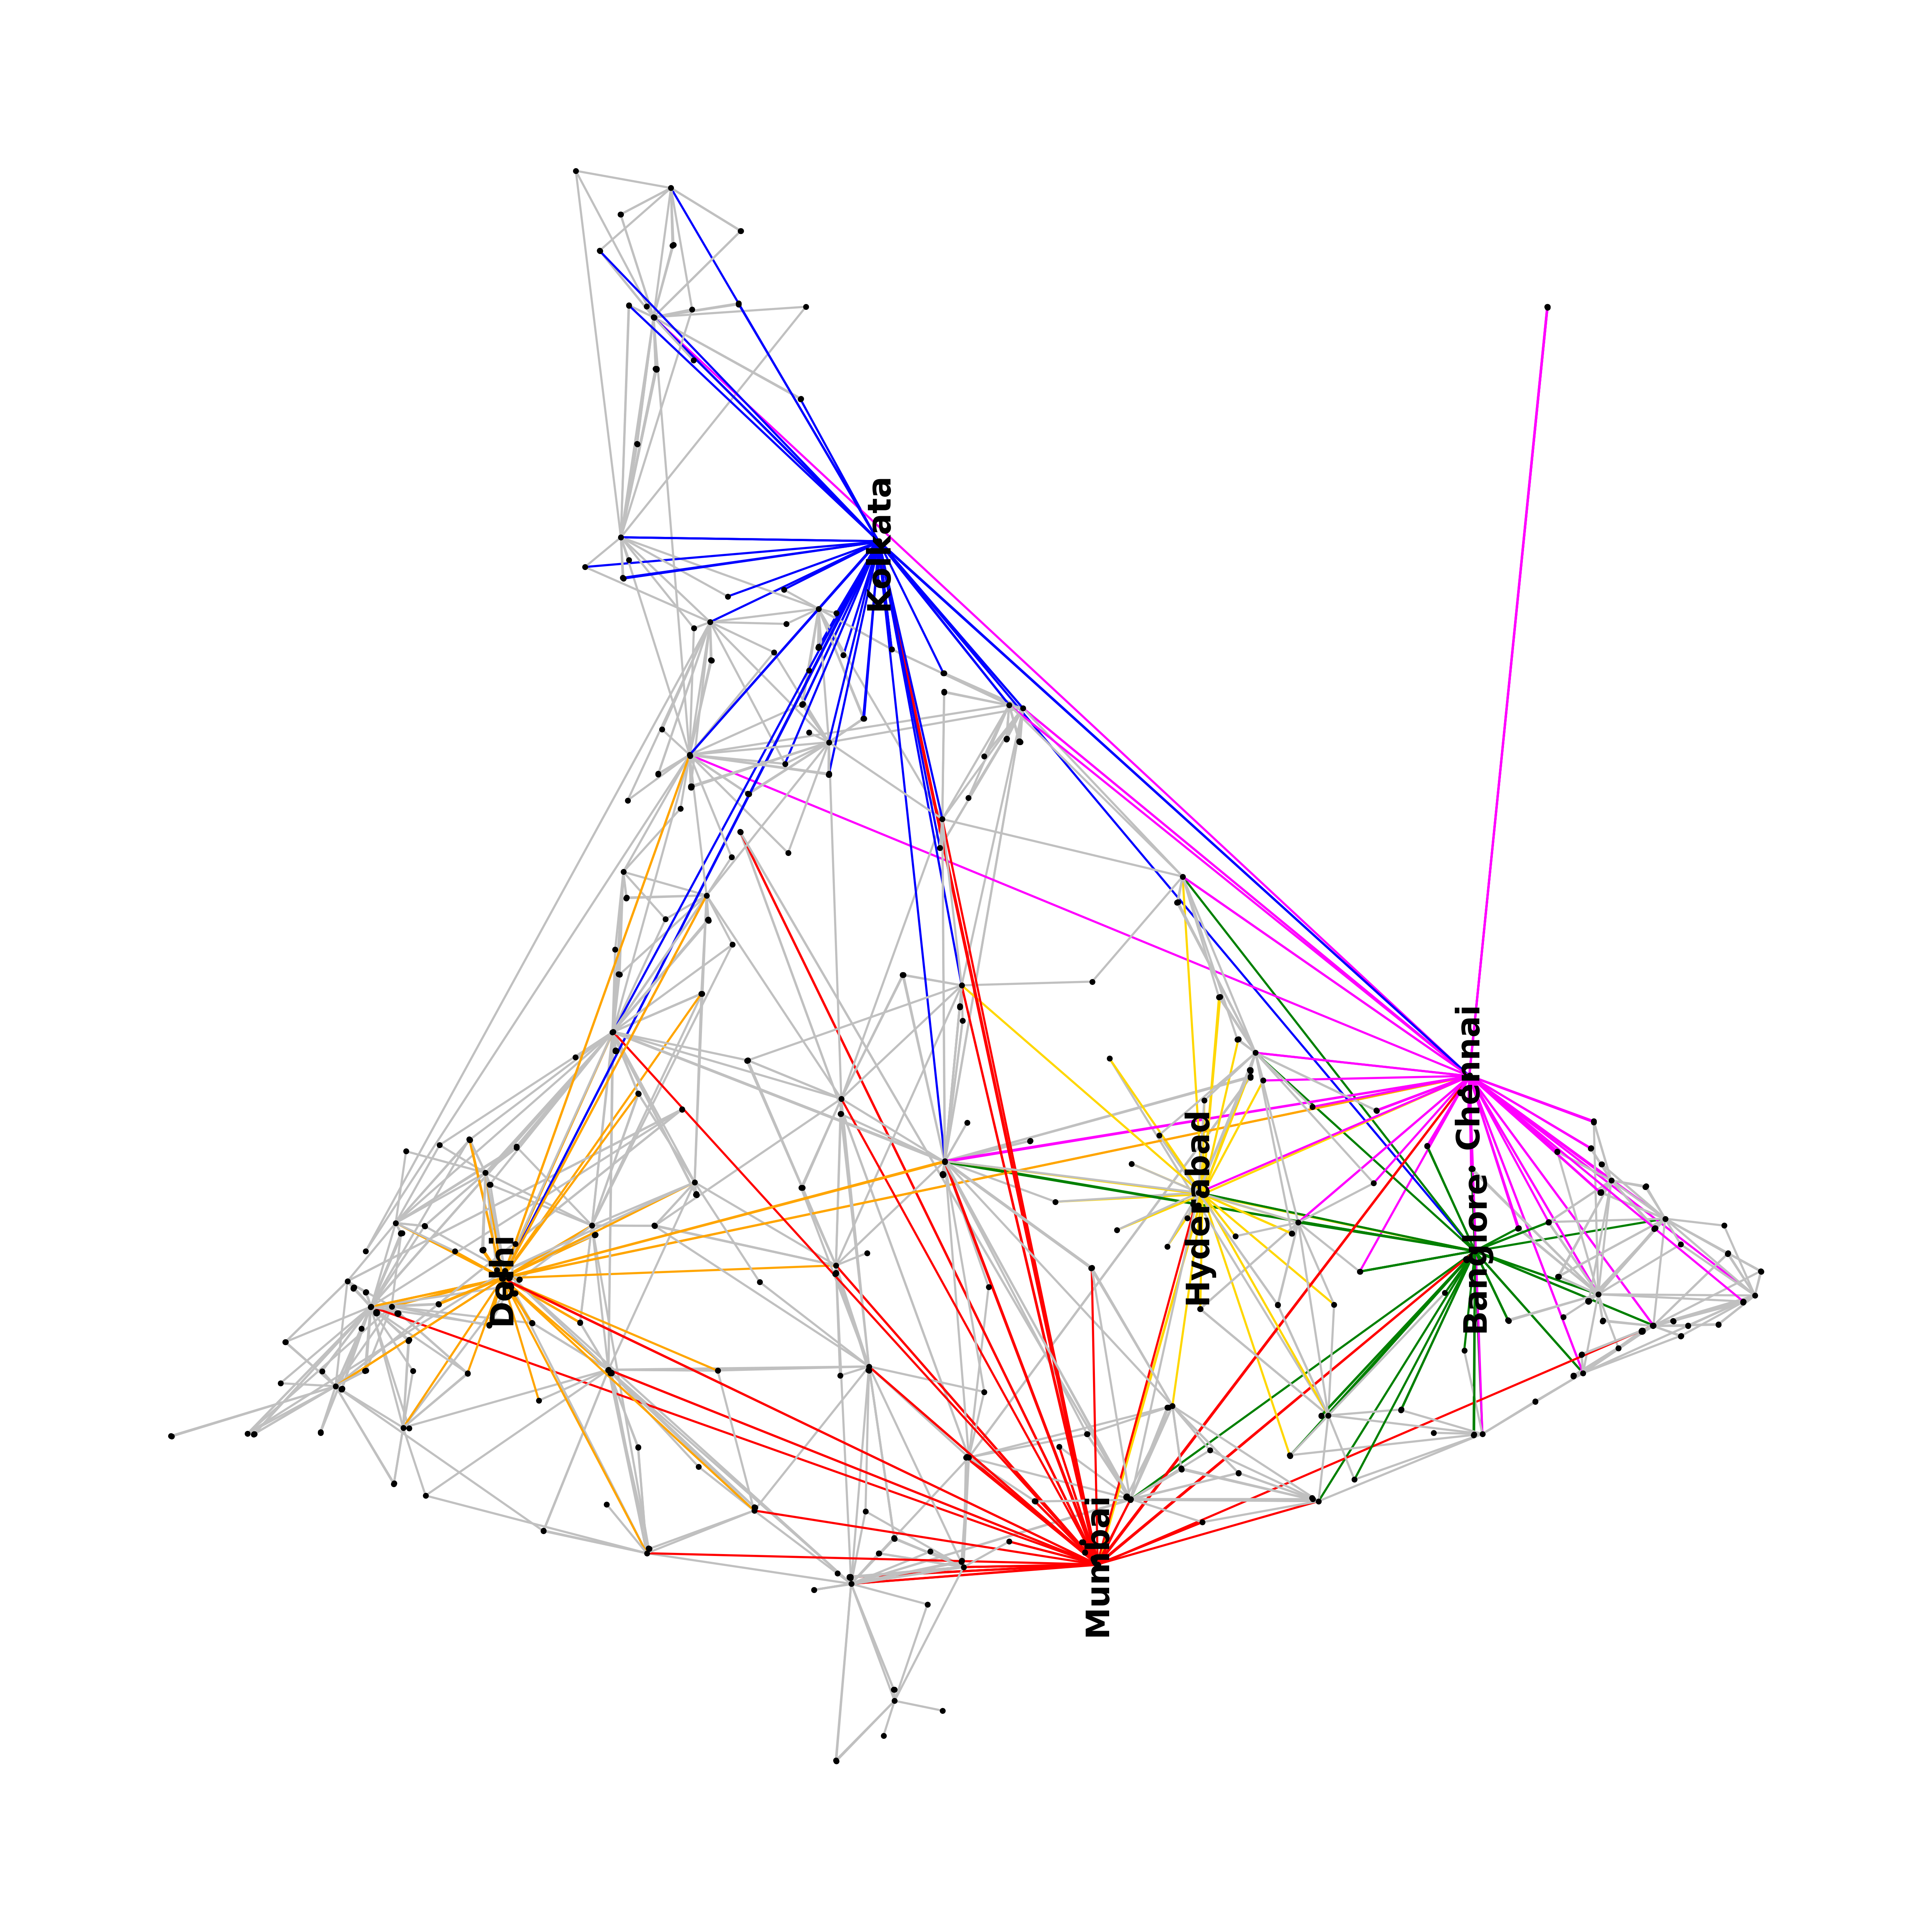

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import sys

try:
    df = pd.read_excel("..\input\BSNL_MPPLAB_Traffic_March_2025.xlsx")
except FileNotFoundError as e:
    print(f"No such file ../input/BSNL_MPPLAB_Traffic_March_2025.xlsx")
    sys.exit(0)
except Exception as e:
    print(f"An error occured {e}")
    sys.exit(0)
    
#Router Positions
try:
    router_pos = pd.read_excel("../input/Router_Coordinates_Jittered_Final.xlsx")
except FileNotFoundError as e:
    print(f"No such file ")
    sys.exit(0)
except Exception as e:
    print(f"An error occured {e}")
    sys.exit(0)
    
source = df["Router1"].dropna().to_list()
destination = df["Router2"].dropna().to_list()
pairs = []
for i in range(len(source)):
    pairs.append((source[i], destination[i]))
    
G = nx.Graph()
for router in source:
    G.add_node(router, label=router)
for edge in pairs:
    G.add_edge(edge[0], edge[1])
    
scaler = StandardScaler()

router_positions = {}
routers = router_pos["From_Router"].tolist() + router_pos["To_Router"].tolist()
router_latitudes = scaler.fit_transform(router_pos[["From_Latitude"]]).tolist() + scaler.fit_transform(router_pos[["To_Latitude"]]).tolist()
router_longitudes = scaler.fit_transform(router_pos[["From_Longitude"]]).tolist() + scaler.fit_transform(router_pos[["To_Longitude"]]).tolist()

for i, router in enumerate(routers):
    router_positions[router] = np.array((router_latitudes[i][0], router_longitudes[i][0]))
    
edge_list = list(G.edges())
color_map = {'Hyderabad': 'gold', "Mumbai": 'red', "Chennai": 'magenta', "Delhi": 'orange', "Kolkata":'blue', "Bangalore": 'green'}
edge_colors_list = []
max_traffic_cities = ['Hyderabad', 'Mumbai', 'Kolkata', 'Delhi', 'Chennai', 'Bangalore']
for u, v in edge_list:
    for city in max_traffic_cities:
        if (city.upper() in u) or (city.upper() in v) :
            edge_colors_list.append(color_map[city])
            break
    else:
        edge_colors_list.append('silver')

G2 = nx.Graph()
max_traffic_cities = ['Hyderabad', 'Mumbai', 'Kolkata', 'Delhi', 'Chennai', 'Banglore']
for city in max_traffic_cities:
    G2.add_node(city, label = city)
city_positions = {
    'latitudes':  [-0.59080228, -0.33944833, 0.20860844, 1.15386777, -1.27122305, -1.28544699],
    'longitudes': [-0.14586206, -1.29456849, 1.97840871, -0.37979552, 0.2687544, -0.29246841]
}
cities_positions = {}
for i, city in enumerate(max_traffic_cities):
    cities_positions[city] = np.array([city_positions['latitudes'][i], city_positions['longitudes'][i]])

plt.figure(figsize=(50, 50))
nx.draw(G, router_positions, with_labels=False, node_size=100, node_color="black", font_size=30, font_weight="bold", edge_color='red', width=1.5)
nx.draw(G2, cities_positions, with_labels=False, node_size=0, font_size=60, font_weight="bold", edge_color='red', width=1.5)
text_labels = nx.draw_networkx_labels(G2, cities_positions, font_size=60, font_weight="bold")
for _, t in text_labels.items():
    t.set_rotation('vertical')
nx.draw_networkx_edges(G, router_positions, edge_color=edge_colors_list, width = 4)
plt.gca().invert_xaxis()
plt.show()